# Exercise 1 [Single Layer Perceptron without built-in functions]

In [160]:
import pandas as pd
import numpy as np

In [165]:
X=np.array([[1,1],
            [1,-1],
            [-1,1],
            [-1,-1]])
y=np.array([1,-1,-1,-1])

d={"X1":X.T[:][0],"X2":X.T[:][1],"y":y}
df = pd.DataFrame(data=d)
print(df)


   X1  X2  y
0   1   1  1
1   1  -1 -1
2  -1   1 -1
3  -1  -1 -1


In [166]:
def activation_function(hx):
    if(hx>0):
        return 1
    else:
        return -1

In [167]:
Bias=0
alpha=1
Weights= [0 for i in range(2)] #2: number of independent variables.

In [168]:
epcho=0
while epcho<1:                      
    for  i in range(len(df['X1'])): #For every entity
        hx=Bias
        for j in range(len(Weights)):
            hx+=Weights[j]*df['X'+str(j+1)][i]
            y_trained= activation_function(hx)
            if(y_trained!=df['y'][i]):
                for k in range(len(Weights)):
                    Weights[k]=Weights[k]+alpha*df['y'][i]*df['X'+str(k+1)][i] #W[i]new=W[i]old+alpha*Y_train*Y_trained
                Bias= Bias+ alpha*df['y'][i]                                   #Bias_New=Bias_old+ Alpha*Y_train
    epcho+=1                

In [169]:
print("New Weights:",Weights)
print("New Bias",Bias)

New Weights: [1, 1]
New Bias -1


In [170]:
for  i in range(len(df['X1'])):
    X1_Test=df['X1'][i]
    X2_Test=df['X2'][i]
    print("X1: {}, X2: {} -> Y: {}".format(X1_Test,X2_Test,activation_function(X2_Test*Weights[0]+X2_Test*Weights[1]+Bias)))

X1: 1, X2: 1 -> Y: 1
X1: 1, X2: -1 -> Y: -1
X1: -1, X2: 1 -> Y: 1
X1: -1, X2: -1 -> Y: -1


# Exercise 2 [Multi Layer Perceptron (Publically available dataset)]

Loading the dataset

In [171]:
data=pd.read_csv(r'C:\Users\rajes\Downloads\labdatasets\heart.csv')

source: https://www.kaggle.com/ronitf/heart-disease-uci

In [172]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [173]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


loading the independent variables into X and dependent variable into Y

In [175]:
X=data.drop('target',axis=1)
Y=data['target']

Target values

In [176]:
print("Classes in the Target variable are: ",Y.unique())

Classes in the Target variable are:  [0 1]


Train Test Splitting

In [177]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)#0.3 -> 30% test and 70% train 

Training a Multi Layered Neural Network Model

In [178]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
mlp.fit(X_train,Y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

Predicting the values for the test set

In [179]:
Y_pred=mlp.predict(X_test)

Confusion Matrix

In [180]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[104  40]
 [ 12 152]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       144
           1       0.79      0.93      0.85       164

    accuracy                           0.83       308
   macro avg       0.84      0.82      0.83       308
weighted avg       0.84      0.83      0.83       308



# Exercise 3: Working with image Dataset [weather classification using images]

In [181]:
import matplotlib.pyplot as plt
from PIL import Image

Sample Image

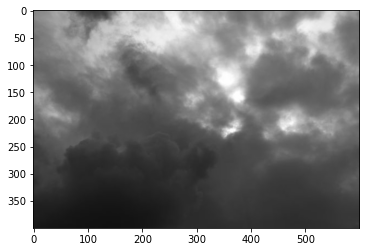

In [182]:
image1 = plt.imread(r'C:\Users\rajes\Downloads\labdatasets\imageDS\dataset2\cloudy\cloudy1.jpg')
plt.imshow(image1)

Generating Training set

In [183]:
images=[]
y=[]
for i in range(1,51):  
    file=r'C:\Users\rajes\Downloads\labdatasets\imageDS\dataset2\cloudy\cloudy'+str(i)+'.jpg'
    im=Image.open(file)
    rsize = im.resize((np.array((250,250))).astype(int))
    img = np.asarray(rsize)
    img=img.flatten()
    images.append(img)
    y.append(0)
Cloud_Images_array=np.array(images)

In [184]:
images=[]
for i in range(1,51):
    file=r'C:\Users\rajes\Downloads\labdatasets\imageDS\dataset2\sunrise\sunrise'+str(i)+'.jpg'
    im=Image.open(file)
    rsize = im.resize((np.array((250,250))).astype(int))
    img = np.asarray(rsize)
    img=img.flatten()
    images.append(img)
    y.append(1)
Sunrise_Images_array=np.array(images)

In [186]:
FinalX=[]
for i in range(50):
        FinalX.append(list(Cloud_Images_array[i]))
for i in range(50):
        FinalX.append(list(Sunrise_Images_array[i]))

In [187]:
X_Train=np.array(FinalX)
Y_Train=np.array(y)

Building a KNN model for classification

In [188]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_Train,Y_Train)

KNeighborsClassifier(n_neighbors=3)

Generating Test set

In [189]:
X_Test=[]
Y_Test=[]
for i in range(10):
    file=r'C:\Users\rajes\Downloads\labdatasets\imageDS\dataset2\sunrise\sunrise'+str(90+i)+'.jpg'
    im=Image.open(file)
    rsize = im.resize((np.array((250,250))).astype(int))
    img = np.asarray(rsize)
    img=img.flatten()
    X_Test.append(list(img))
    Y_Test.append(1)
    
    file=r'C:\Users\rajes\Downloads\labdatasets\imageDS\dataset2\cloudy\cloudy'+str(90+i)+'.jpg'
    im=Image.open(file)
    rsize = im.resize((np.array((250,250))).astype(int))
    img = np.asarray(rsize)
    img=img.flatten()
    X_Test.append(list(img))
    Y_Test.append(0)
X_Test=np.array(X_Test)
Y_Test=np.array(Y_Test)

In [190]:
ypred=model.predict(X_Test)

confusion matrix and classification report

In [191]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_Test,ypred))
print(classification_report(Y_Test,ypred))

[[9 1]
 [6 4]]
              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.80      0.40      0.53        10

    accuracy                           0.65        20
   macro avg       0.70      0.65      0.63        20
weighted avg       0.70      0.65      0.63        20

